In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
#한글 폰트 안깨지게 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 데이터 불러오기(2013-01~2023-09)

In [51]:
data = pd.read_csv('../Final project/data/data.csv', encoding='cp949')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,경제심리지수,주택매매가격지수
0,13-Jan,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477,94.4,70.462
1,13-Feb,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592,96.2,70.421
2,13-Mar,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934,98.3,70.389
3,13-Apr,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082,97.9,70.391
4,13-May,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599,97.2,70.381


In [52]:
from datetime import datetime
for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,경제심리지수,주택매매가격지수
0,2013-01-01 00:00:00,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477,94.4,70.462
1,2013-02-01 00:00:00,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592,96.2,70.421
2,2013-03-01 00:00:00,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934,98.3,70.389
3,2013-04-01 00:00:00,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082,97.9,70.391
4,2013-05-01 00:00:00,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599,97.2,70.381


In [53]:
# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2013-01-01 to 2023-09-01
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준금리        129 non-null    float64
 1   주택건설인허가실적   129 non-null    int64  
 2   전산업생산지수     129 non-null    float64
 3   주택담보대출금리    129 non-null    float64
 4   건설업_업황전망    129 non-null    int64  
 5   건설업_매출전망    129 non-null    int64  
 6   건설업_자금사전전망  129 non-null    int64  
 7   소비자물가지수     129 non-null    float64
 8   생산자물가지수     129 non-null    float64
 9   미분양주택현황     129 non-null    int64  
 10  실업률         129 non-null    float64
 11  고용률         129 non-null    float64
 12  M2          129 non-null    int64  
 13  CD금리        129 non-null    float64
 14  국고채(3년)     129 non-null    float64
 15  국고채(10년)    129 non-null    float64
 16  국고채(30년)    129 non-null    float64
 17  회사채(3년)     129 non-null    float64
 18  KOSPI_종가    129 non-null    float64
 19  KOSDAQ_종가 

In [55]:
data.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '주택전세가격지수', '환율', '주택 거래량',
       '경제심리지수', '주택매매가격지수'],
      dtype='object')

In [56]:
var_group = {
             '건설업': ['주택건설인허가실적', '건설업_업황전망', '건설업_매출전망', '건설업_자금사전전망'],
             '부동산 시장': ['주택담보대출금리', '미분양주택현황'],
             '채권금리': ['국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)'],
             '주식시장': ['KOSPI_종가', 'KOSDAQ_종가'], 
             '물가': ['소비자물가지수', '생산자물가지수'],
             '경제': ['환율', '전산업생산지수','고용률', 'M2', 'GDP']} # 주택전세가격지수, 주택거래량은 pca 적용 X, 기준금리는 외생변수로 설정

<AxesSubplot:xlabel='Date'>

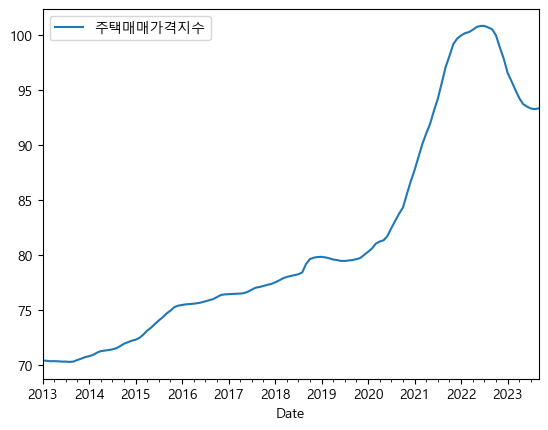

In [57]:
data[['주택매매가격지수']].plot() 

In [58]:
data.shape

(129, 28)

#### Granger causality test

In [59]:
# function of stationary test
from statsmodels.tsa.stattools import adfuller
 
def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: {:.4f}'.format(result[0]))
  print('p-value: {:.4f}'.format(result[1]))


In [60]:
diff1_data = data.diff(1).dropna()
for i in diff1_data:
  print('--Test statistic for %s' % i)
  adf(diff1_data[i])
  print() # 기준금리, 주택건설인허가실적, 전산업생산지수, 주택담보대출금리, 소비자물가지수, 생산자물가지수, 주택매매가격지수 정상성 만족 X (유의수준 10%)

--Test statistic for 기준금리
ADF Statistic: -3.1247
p-value: 0.0248

--Test statistic for 주택건설인허가실적
ADF Statistic: -2.1124
p-value: 0.2395

--Test statistic for 전산업생산지수
ADF Statistic: -1.5455
p-value: 0.5109

--Test statistic for 주택담보대출금리
ADF Statistic: -2.2629
p-value: 0.1842

--Test statistic for 건설업_업황전망
ADF Statistic: -10.7813
p-value: 0.0000

--Test statistic for 건설업_매출전망
ADF Statistic: -9.3965
p-value: 0.0000

--Test statistic for 건설업_자금사전전망
ADF Statistic: -4.7179
p-value: 0.0001

--Test statistic for 소비자물가지수
ADF Statistic: -1.8628
p-value: 0.3497

--Test statistic for 생산자물가지수
ADF Statistic: -2.4317
p-value: 0.1330

--Test statistic for 미분양주택현황
ADF Statistic: -5.9440
p-value: 0.0000

--Test statistic for 실업률
ADF Statistic: -2.9207
p-value: 0.0430

--Test statistic for 고용률
ADF Statistic: -2.6528
p-value: 0.0826

--Test statistic for M2
ADF Statistic: -2.8474
p-value: 0.0518

--Test statistic for CD금리
ADF Statistic: -5.6829
p-value: 0.0000

--Test statistic for 국고채(3년)
ADF Statistic: 

In [61]:
diff2_data = diff1_data[['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '소비자물가지수', '생산자물가지수', '주택매매가격지수']].diff()
diff1_data = diff1_data.drop(columns=['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '소비자물가지수', '생산자물가지수', '주택매매가격지수'], axis=1)
diff2_data = pd.concat([diff1_data, diff2_data], axis=1).dropna()

In [62]:

for i in diff2_data:
  print('--Test statistic for %s' % i)
  adf(diff2_data[i])
  print() # 모든 변수가 정상성을 만족함

--Test statistic for 건설업_업황전망
ADF Statistic: -10.8040
p-value: 0.0000

--Test statistic for 건설업_매출전망
ADF Statistic: -9.3852
p-value: 0.0000

--Test statistic for 건설업_자금사전전망
ADF Statistic: -4.5184
p-value: 0.0002

--Test statistic for 미분양주택현황
ADF Statistic: -5.9480
p-value: 0.0000

--Test statistic for 실업률
ADF Statistic: -2.8869
p-value: 0.0469

--Test statistic for 고용률
ADF Statistic: -2.6808
p-value: 0.0774

--Test statistic for M2
ADF Statistic: -2.7800
p-value: 0.0612

--Test statistic for CD금리
ADF Statistic: -5.6597
p-value: 0.0000

--Test statistic for 국고채(3년)
ADF Statistic: -8.6068
p-value: 0.0000

--Test statistic for 국고채(10년)
ADF Statistic: -8.5273
p-value: 0.0000

--Test statistic for 국고채(30년)
ADF Statistic: -8.2018
p-value: 0.0000

--Test statistic for 회사채(3년)
ADF Statistic: -6.6845
p-value: 0.0000

--Test statistic for KOSPI_종가
ADF Statistic: -12.1261
p-value: 0.0000

--Test statistic for KOSDAQ_종가
ADF Statistic: -12.1706
p-value: 0.0000

--Test statistic for 국채 거래량
ADF Stati

In [63]:
'''
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=12, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

cause_matrix = grangers_causation_matrix(diff2_data, data.columns) 
cause_matrix.iloc[-1, :] # p-value가 0.05보다 작으면 x -> y 인과관계가 있다. 회사채거래량을 제외하면 모두 주택매매가격지수와 인과관계가 있다.
'''

'\nfrom statsmodels.tsa.stattools import grangercausalitytests\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\ndef grangers_causation_matrix(data, variables, test=\'ssr_chi2test\', maxlag=12, verbose=False):    \n    """Check Granger Causality of all possible combinations of the Time series.\n    The rows are the response variable, columns are predictors. The values in the table \n    are the P-Values. P-Values lesser than the significance level (0.05), implies \n    the Null Hypothesis that the coefficients of the corresponding past values is \n    zero, that is, the X does not cause Y can be rejected.\n\n    data      : pandas dataframe containing the time series variables\n    variables : list containing names of the time series variables.\n    """\n    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)\n    for c in df.columns:\n        for r in df.index:\n            test_result = grangercausalitytests(data[[r, c]], maxlag, v

In [64]:
'''
cause_matrix.iloc[:,-1] # 양방향 둘다 유의하면 x->y 인과관계 있다고 할 수 없음
# x->y 일방향 유의 변수: 기준금리, 주택건설인허가실적, 건설업_매출전망, 소비자물가지수, 국고채(3,10,30년), GDP, 주택거래량, 경제심리지수
'''


'\ncause_matrix.iloc[:,-1] # 양방향 둘다 유의하면 x->y 인과관계 있다고 할 수 없음\n# x->y 일방향 유의 변수: 기준금리, 주택건설인허가실적, 건설업_매출전망, 소비자물가지수, 국고채(3,10,30년), GDP, 주택거래량, 경제심리지수\n'

### Scaling

In [65]:
# train, test 분리
train = data[:int(len(data)*0.9)]
test = data[int(len(data)*0.9):]
y_train = train[['주택매매가격지수']]
y_test = test[['주택매매가격지수']]
X_train = train.drop(columns=['주택매매가격지수'], axis=1)
X_test = test.drop(columns=['주택매매가격지수'], axis=1)

In [66]:
from sklearn.preprocessing import MinMaxScaler
mm_X_train = MinMaxScaler()
X_train_sc = mm_X_train.fit_transform(X_train)
mm_y_train = MinMaxScaler()
y_train_sc = mm_y_train.fit_transform(y_train)

mm_X_test = MinMaxScaler()
X_test_sc = mm_X_test.fit_transform(X_test)
mm_y_test = MinMaxScaler()
y_test_sc = mm_y_test.fit_transform(y_test)

In [67]:
X_train_sc = pd.DataFrame(X_train_sc, index=X_train.index)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc, index=X_test.index)
X_test_sc.columns = X_test.columns

In [68]:
y_train_sc = pd.DataFrame(y_train_sc, index=y_train.index)
y_train_sc.columns = y_train.columns

y_test_sc = pd.DataFrame(y_test_sc, index=y_test.index)
y_test_sc.columns = y_test.columns

In [69]:
X = pd.concat([X_train_sc, X_test_sc])
X_pca = X.drop(columns=['주택전세가격지수'], axis=1) # 주택전세가격지수 pca X

In [70]:
X_pca.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '환율', '주택 거래량', '경제심리지수'],
      dtype='object')

#### 그룹 각각의 공통요인 추출

In [71]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA 수행 함수
def apply_pca(variables, group_name, n_components=1):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(variables)
    explained_variance_ratio = pca.explained_variance_ratio_
    return pd.DataFrame(data=principal_components, columns=[f'{group_name}_pc{i+1}' for i in range(n_components)]), explained_variance_ratio

# 각 변수 그룹에 대한 PCA 수행
pca_results = {}
explained_variance_ratios = {}

for group, variables in var_group.items():
    variables_data = X_pca[variables]
    pca_results[group], explained_variance_ratios[group] = apply_pca(variables_data, group)

# 결과 출력
for group, result_df in pca_results.items():
    print(f"PCA results for {group}:")
    print(result_df)
    print(f"Explained Variance Ratios for {group}: {explained_variance_ratios[group]}")
    print("\n")


PCA results for 건설업:
      건설업_pc1
0   -0.741866
1   -0.451541
2   -0.523430
3   -0.368974
4   -0.422549
..        ...
124  0.036538
125  0.001391
126  0.327424
127  0.325840
128  0.077961

[129 rows x 1 columns]
Explained Variance Ratios for 건설업: [0.57313019]


PCA results for 부동산 시장:
     부동산 시장_pc1
0      0.778400
1      0.742935
2      0.692743
3      0.665479
4      0.601515
..          ...
124    0.600320
125    0.565281
126    0.496580
127    0.478280
128    0.453064

[129 rows x 1 columns]
Explained Variance Ratios for 부동산 시장: [0.77836929]


PCA results for 채권금리:
     채권금리_pc1
0    0.613032
1    0.576023
2    0.484398
3    0.448577
4    0.481964
..        ...
124 -0.609425
125 -0.163440
126 -0.067929
127  0.179582
128  0.353743

[129 rows x 1 columns]
Explained Variance Ratios for 채권금리: [0.92535184]


PCA results for 주식시장:
     주식시장_pc1
0   -0.440554
1   -0.368113
2   -0.351124
3   -0.356738
4   -0.321312
..        ...
124  0.576063
125  0.589841
126  0.876640
127  0.748035
128

In [72]:
# 각 PCA 결과를 하나의 DataFrame으로 합치기
X_pca = pd.concat(pca_results.values(), axis=1)
X_pca.index = data.index

X_train_pca = X_pca[:int(len(X_pca)*0.9)]
X_test_pca = X_pca[int(len(X_pca)*0.9):]

In [73]:
train_total = pd.concat([X_train_pca, X_train_sc[['주택전세가격지수', '주택 거래량']], y_train_sc], axis=1) # 주택전세가격지수 추가

In [74]:
train_total.head()

,건설업_pc1,부동산 시장_pc1,채권금리_pc1,주식시장_pc1,물가_pc1,경제_pc1,주택전세가격지수,주택 거래량,주택매매가격지수
Date,,,,,,,,,
2013-01-01,-0.741866,0.778400,0.613032,-0.440554,-0.235296,-0.730172,0.000000,0.000000,0.004551
2013-02-01,-0.451541,0.742935,0.576023,-0.368113,-0.200063,-0.710044,0.009709,0.068153,0.003208
2013-03-01,-0.523430,0.692743,0.484398,-0.351124,-0.216168,-0.553820,0.024272,0.175387,0.002161
2013-04-01,-0.368974,0.665479,0.448577,-0.356738,-0.231702,-0.436456,0.043689,0.281171,0.002226
2013-05-01,-0.422549,0.601515,0.481964,-0.321312,-0.242049,-0.410529,0.053398,0.374761,0.001899


### DFM

In [22]:
"""
# Define the range of values for n_factors and factor_order
n_factors_range = [1, 2, 3, 4, 5]
factor_order_range = [2, 3, 4, 5]

best_aic = np.inf
best_params = None

endog = train_total

# Perform grid search
for n_factors in n_factors_range:
    for factor_order in factor_order_range:
        # Create and fit the DFM model
        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)
        dfm_results = dfm.fit(maxiter=500)

        # Get AIC for the current model
        current_aic = dfm_results.aic

        # Update the best parameters if the current model has a lower AIC
        if current_aic < best_aic:
            best_aic = current_aic
            best_params = {'n_factors': n_factors, 'factor_order': factor_order}

# Print the best parameters
print(f"Best parameters: {best_params}")
# maxiter=500 일 때, n_factors=1, factor_order=2

"""

'\n# Define the range of values for n_factors and factor_order\nn_factors_range = [1, 2, 3, 4, 5]\nfactor_order_range = [2, 3, 4, 5]\n\nbest_aic = np.inf\nbest_params = None\n\nendog = train_total\n\n# Perform grid search\nfor n_factors in n_factors_range:\n    for factor_order in factor_order_range:\n        # Create and fit the DFM model\n        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)\n        dfm_results = dfm.fit(maxiter=500)\n\n        # Get AIC for the current model\n        current_aic = dfm_results.aic\n\n        # Update the best parameters if the current model has a lower AIC\n        if current_aic < best_aic:\n            best_aic = current_aic\n            best_params = {\'n_factors\': n_factors, \'factor_order\': factor_order}\n\n# Print the best parameters\nprint(f"Best parameters: {best_params}")\n# maxiter=500 일 때, n_factors=1, factor_order=2\n\n'

In [23]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

endog = train_total
exog = X_train_sc[['기준금리']]

# DFM 모델 정의
n_factors = 1
dfm = DynamicFactor(endog=endog, exog = exog, k_factors=n_factors, factor_order=2, enforce_stationarity=True, error_order=2)

dfm_results = dfm.fit(maxiter=500)

In [24]:
dfm_results.summary()

Dep. Variable:,"['건설업_pc1', '부동산 시장_pc1', '채권금리_pc1', '주식시장_pc1', '물가_pc1', '경제_pc1', '주택전세가격지수', '주택 거래량', '주택매매가격지수']",No. Observations:,116
Model:,"DynamicFactor(factors=1, order=2)",Log Likelihood,1218.265
,+ 1 regressors,AIC,-2342.531
,+ AR(2) errors,BIC,-2213.112
Date:,"Fri, 08 Dec 2023",HQIC,-2289.994
Time:,10:59:52,,
Sample:,01-01-2013,,
,- 08-01-2022,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"2.38, 1.92, 2.60, 1.26, 0.54, 0.09, 3.10, 3.94, 0.04",Jarque-Bera (JB):,"18.21, 26.84, 39.18, 20.18, 24.53, 33.28, 13.18, 14.75, 116.62"
Prob(Q):,"0.12, 0.17, 0.11, 0.26, 0.46, 0.77, 0.08, 0.05, 0.84",Prob(JB):,"0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00"


In [25]:
dfm_results.params

loading.f1.건설업_pc1                1.619927
loading.f1.부동산 시장_pc1            -2.312568
loading.f1.채권금리_pc1              -1.340167
loading.f1.주식시장_pc1               2.618162
loading.f1.물가_pc1                 2.130499
loading.f1.경제_pc1                 2.897814
loading.f1.주택전세가격지수               0.227940
loading.f1.주택 거래량                 0.503744
loading.f1.주택매매가격지수               0.195807
beta.기준금리.건설업_pc1                -0.267660
beta.기준금리.부동산 시장_pc1             -0.294987
beta.기준금리.채권금리_pc1                0.141743
beta.기준금리.주식시장_pc1               -0.305836
beta.기준금리.물가_pc1                  0.424733
beta.기준금리.경제_pc1                 -0.374430
beta.기준금리.주택전세가격지수                0.046602
beta.기준금리.주택 거래량                 -0.392199
beta.기준금리.주택매매가격지수                0.033832
sigma2.건설업_pc1                    0.044689
sigma2.부동산 시장_pc1                 0.001070
sigma2.채권금리_pc1                   0.010268
sigma2.주식시장_pc1                   0.011148
sigma2.물가_pc1                     0.000577
sigma2.경제_p

0    0.195807
1    0.185952
2    0.184316
3    0.182374
4    0.180466
5    0.178576
Name: 주택매매가격지수, dtype: float64


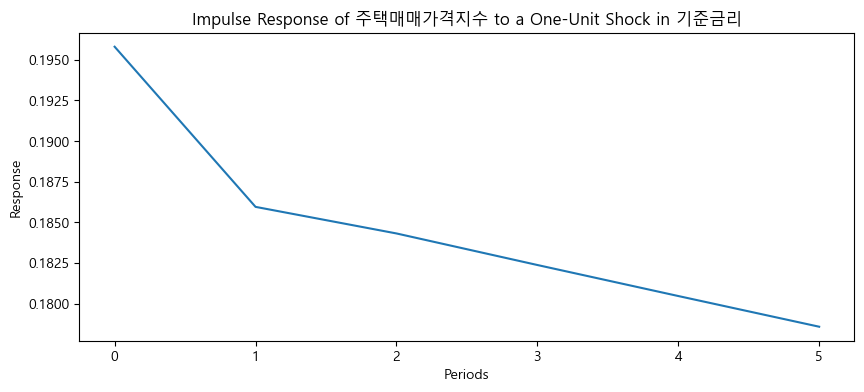

In [26]:
# Define the number of periods for which you want to compute the impulse responses
nperiods = 5

# Obtain the impulse responses
irf = dfm_results.impulse_responses(steps=nperiods)

# Print or visualize the impulse responses
print(irf['주택매매가격지수'])

# Plot each variable's impulse response
# for i, col in enumerate(irf.columns):
plt.figure(figsize=(10, 4))
plt.plot(irf.index, irf['주택매매가격지수'])
plt.title(f'Impulse Response of 주택매매가격지수 to a One-Unit Shock in 기준금리')
plt.xlabel('Periods')
plt.ylabel('Response')
plt.show()


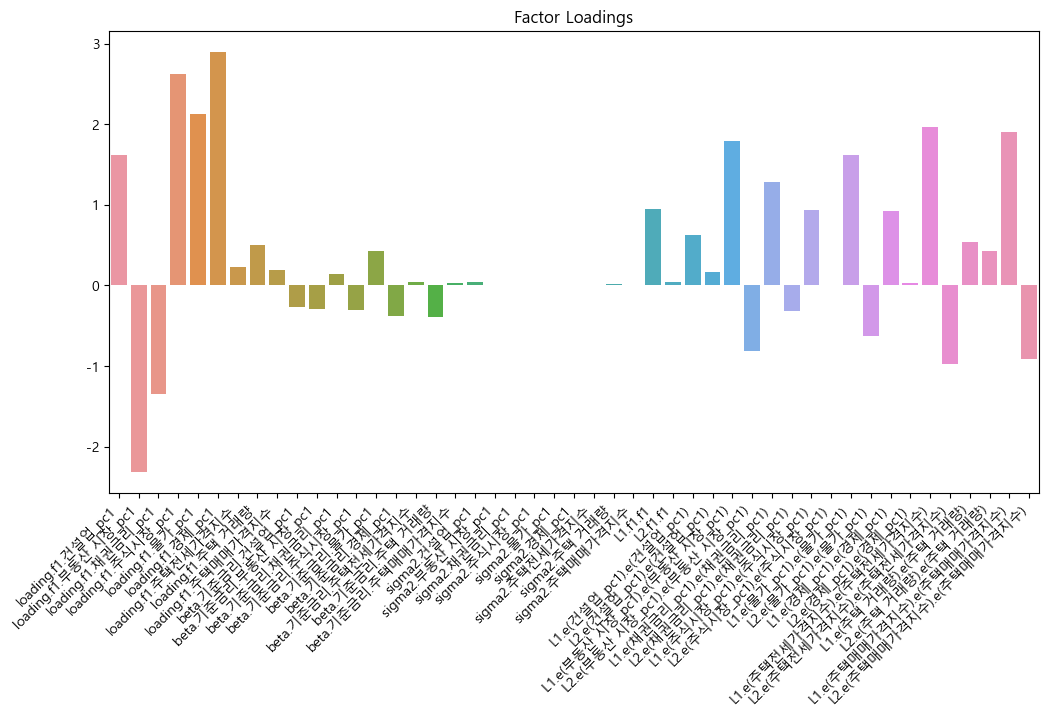

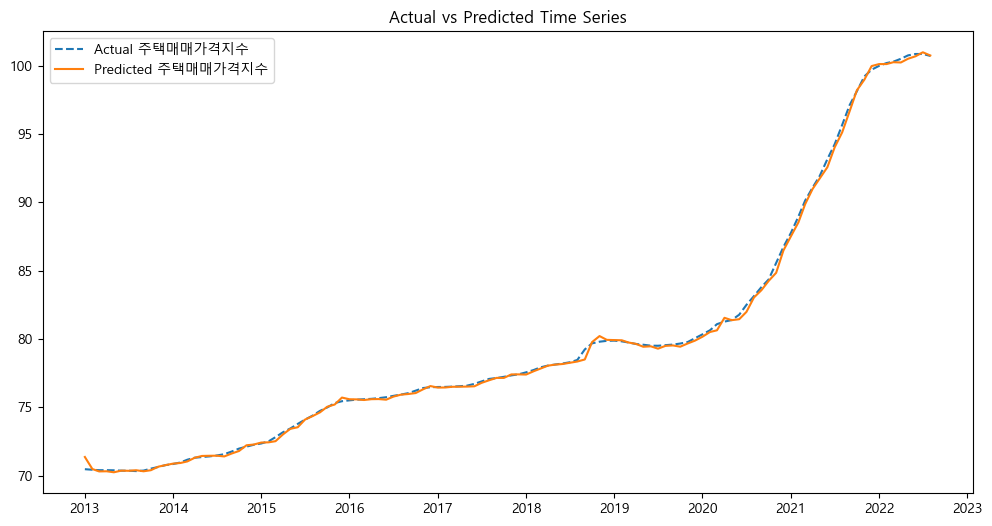

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract factor loadings from the results
factor_loadings = dfm_results.params

# Plot factor loadings
plt.figure(figsize=(12, 6))
sns.barplot(x=factor_loadings.index, y=factor_loadings.values)
plt.title('Factor Loadings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot time series of dependent variables and predicted values
fig, ax = plt.subplots(figsize=(12, 6))
y_pred = mm_y_train.inverse_transform(dfm_results.predict()[['주택매매가격지수']])
y_pred = pd.DataFrame(y_pred, index = y_train.index)
y_pred.columns = y_train.columns
for i, variable in enumerate(['주택매매가격지수']):
    ax.plot(y_train.index, y_train[variable], label=f'Actual {variable}', linestyle='--')
    ax.plot(y_train.index, y_pred[variable], label=f'Predicted {variable}')

ax.set_title('Actual vs Predicted Time Series')
ax.legend()
plt.show()


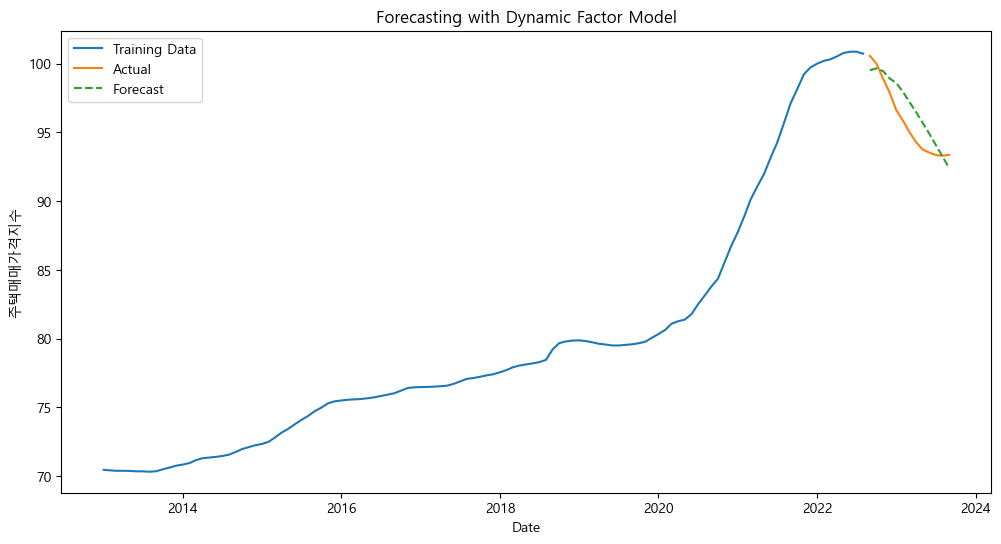

In [28]:
# Number of periods to forecast
forecast_periods = 13
exog_test = X_test_sc[['기준금리']]

# Get the prediction and forecast
dfm_forecast = dfm_results.get_forecast(exog = exog_test, steps=forecast_periods)

# Extract predicted values
y_pred_forecast = dfm_forecast.predicted_mean[['주택매매가격지수']]

# Inverse transform the predicted values to the original scale
y_pred_forecast_original = mm_y_train.inverse_transform(y_pred_forecast)

# Create a DataFrame for the forecast values
forecast_index = pd.date_range(start=y_train.index[-1], periods=forecast_periods + 1, freq='MS')[1:]
y_pred_forecast_df = pd.DataFrame(y_pred_forecast_original, index=forecast_index, columns=['주택매매가격지수'])

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train['주택매매가격지수'], label='Training Data', linestyle='-')
plt.plot(y_test.index, y_test['주택매매가격지수'], label='Actual', linestyle = '-')
plt.plot(y_pred_forecast_df.index, y_pred_forecast_df['주택매매가격지수'], label='Forecast', linestyle='--')
plt.title('Forecasting with Dynamic Factor Model')
plt.xlabel('Date')
plt.ylabel('주택매매가격지수')
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_pred['주택매매가격지수'], y_train['주택매매가격지수'])**0.5
print('Train RMSE:', train_rmse)
test_rmse = mean_squared_error(y_test, y_pred_forecast_df)**0.5
print('Test RMSE:', test_rmse)

Train RMSE: 0.21450593528956538
Test RMSE: 1.459963208127332


In [30]:
df_compare = pd.concat([y_test, y_pred_forecast_df], axis=1)
df_compare.columns = ['실제 주택매매가겨지수', '예측 매매가격지수']
df_compare

,실제 주택매매가겨지수,예측 매매가격지수
2022-09-01,100.568,99.522438
2022-10-01,100.014,99.659512
2022-11-01,98.909,99.457822
2022-12-01,97.894,98.926172
2023-01-01,96.612,98.589708
2023-02-01,95.848,97.939671
2023-03-01,95.054,97.241898
2023-04-01,94.316,96.503412
2023-05-01,93.766,95.730785
2023-06-01,93.536,94.930156


In [48]:
from statsmodels.tsa.stattools import adfuller
 
def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: {:.4f}'.format(result[0]))
  print('p-value: {:.4f}'.format(result[1]))


In [76]:
train_total_diff1 = train_total.diff(1).dropna()

In [77]:
for i in train_total_diff1:
  print('--Test statistic for %s' % i)
  adf(train_total_diff1[i])
  print()

--Test statistic for 건설업_pc1
ADF Statistic: -3.0131
p-value: 0.0337

--Test statistic for 부동산 시장_pc1
ADF Statistic: -1.8719
p-value: 0.3454

--Test statistic for 채권금리_pc1
ADF Statistic: -5.4735
p-value: 0.0000

--Test statistic for 주식시장_pc1
ADF Statistic: -11.6430
p-value: 0.0000

--Test statistic for 물가_pc1
ADF Statistic: -0.8631
p-value: 0.7999

--Test statistic for 경제_pc1
ADF Statistic: -1.4095
p-value: 0.5777

--Test statistic for 주택전세가격지수
ADF Statistic: -2.2205
p-value: 0.1989

--Test statistic for 주택 거래량
ADF Statistic: -8.6014
p-value: 0.0000

--Test statistic for 주택매매가격지수
ADF Statistic: -2.2202
p-value: 0.1990



In [ ]:

diff1_data = data.diff(1).dropna()
for i in diff1_data:
  print('--Test statistic for %s' % i)
  adf(diff1_data[i])
  print()

In [79]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('../Final project/data/data.csv', encoding='cp949')

from datetime import datetime
for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')

# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

var_group = {
             '건설업': ['주택건설인허가실적', '건설업_업황전망', '건설업_매출전망', '건설업_자금사전전망'],
             '부동산 시장': ['주택담보대출금리', '미분양주택현황'],
             '채권금리': ['국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)'],
             '주식시장': ['KOSPI_종가', 'KOSDAQ_종가'], 
             '물가': ['소비자물가지수', '생산자물가지수'],
             '경제': ['환율', '전산업생산지수','고용률', 'M2', 'GDP']} # 주택전세가격지수, 주택거래량은 pca 적용 X, 기준금리는 외생변수로 설정

# Set the size of the rolling window
window_size = 12  # You can adjust this based on the desired window size

# Create empty lists to store training and test RMSE values
train_rmse_list = []
test_rmse_list = []

# Iterate over the dataset with a rolling window
for i in range(len(data) - window_size):
    # Define the training and test sets for the current iteration
    train_window = data.iloc[i:i+window_size]
    test_window = data.iloc[i+window_size:i+window_size+1]

    # Extract features and target variables from the current window
    y_train_window = train_window[['주택매매가격지수']]
    X_train_window = train_window.drop(columns=['주택매매가격지수'], axis=1)

    y_test_window = test_window[['주택매매가격지수']]
    X_test_window = test_window.drop(columns=['주택매매가격지수'], axis=1)

    # Perform any necessary scaling or preprocessing (you may need to adjust this based on your specific preprocessing steps)
    mm_X_train_window = MinMaxScaler()
    X_train_window_sc = mm_X_train_window.fit_transform(X_train_window)
    mm_y_train_window = MinMaxScaler()
    y_train_window_sc = mm_y_train_window.fit_transform(y_train_window)

    mm_X_test_window = MinMaxScaler()
    X_test_window_sc = mm_X_test_window.fit_transform(X_test_window)

    X_train_window_sc = pd.DataFrame(X_train_window_sc, index=X_train_window.index)
    X_train_window_sc.columns = X_train_window.columns
    y_train_window_sc = pd.DataFrame(y_train_window_sc, index=y_train_window.index)
    y_train_window_sc.columns = y_train_window.columns

    from sklearn.decomposition import PCA
    import pandas as pd

    # PCA 수행 함수
    def apply_pca(variables, group_name, n_components=1):
        pca = PCA(n_components=n_components)
        principal_components = pca.fit_transform(variables)
        explained_variance_ratio = pca.explained_variance_ratio_
        return pd.DataFrame(data=principal_components, columns=[f'{group_name}_pc{i+1}' for i in range(n_components)]), explained_variance_ratio

    # 각 변수 그룹에 대한 PCA 수행
    pca_results = {}
    explained_variance_ratios = {}

    for group, variables in var_group.items():
        variables_data = X_train_window_sc[variables]
        pca_results[group], explained_variance_ratios[group] = apply_pca(variables_data, group)
    
    # 각 PCA 결과를 하나의 DataFrame으로 합치기
    X_train_window_pca = pd.concat(pca_results.values(), axis=1)
    X_train_window_pca.index = X_train_window.index
    
    train_total = pd.concat([X_train_window_pca, X_train_window_sc[['주택전세가격지수', '주택 거래량']], y_train_window_sc], axis=1) # 주택전세가격지수 추가

    # Fit the model using the training window
    endog_window = train_total
    exog_window = X_train_window_sc[['기준금리']]

    

    dfm_window = DynamicFactor(endog=endog_window, exog=exog_window, k_factors=1, factor_order=2, enforce_stationarity=False, error_order=2)
    dfm_results_window = dfm_window.fit(maxiter=500)

    # Get the prediction and forecast for the test window
    dfm_forecast_window = dfm_results_window.get_forecast(exog=X_test_window[['기준금리']], steps=forecast_periods)
    y_pred_forecast_window = mm_y_train_window.inverse_transform(dfm_forecast_window.predicted_mean[['주택매매가격지수']])

    # Calculate and store the RMSE for the training and test sets
    train_rmse_window = mean_squared_error(y_train_window, mm_y_train_window.inverse_transform(dfm_results_window.predict()['주택매매가격지수']))**0.5
    test_rmse_window = mean_squared_error(y_test_window, mm_y_train_window.inverse_transform(y_pred_forecast_window))**0.5

    train_rmse_list.append(train_rmse_window)
    test_rmse_list.append(test_rmse_window)

# Print or analyze the results as needed
print("Train RMSE for each window:", train_rmse_list)
print("Test RMSE for each window:", test_rmse_list)


Train RMSE for each window: [70.34333515882992, 70.24088178208487, 70.28847054843747, 70.29576690095173, 70.3570792972191, 70.34672920928026, 70.4012598322408, 70.92210544792552, 70.49742431566325, 70.66101689600008, 70.81266467371591, 70.95957598973307, 71.06427208663558, 71.51777204009727, 71.35902681645031, 71.81097815746362, 71.71263626868578, 71.86908638339058, 72.0614117074301, 72.2602023308293, 72.51310510555362, 72.75918971626866, 72.99296433223628, 73.23638121207561, 73.46545957406973, 73.66472881322872, 73.88286817693839, 74.09423020329217, 74.26900639097043, 74.43270342396312, 74.57114376369694, 74.69567529381251, 74.86132330119193, 74.97793230420906, 75.32855542648028, 75.49179245249547, 75.52462629979195, 75.57159180324668, 75.56811548101574, 75.59344929993478, 75.6284165872454, 75.68722678040785, 75.78990406627904, 76.437101062464, 76.07791687415796, 76.21376076412352, 76.37603626987753, 76.4363722983896, 76.49099459092088, 76.54676068997846, 76.62311731495888, 76.7457471

In [43]:
X_train_pca

,건설업_pc1,부동산 시장_pc1,채권금리_pc1,주식시장_pc1,물가_pc1,경제_pc1
Date,,,,,,
2013-01-01,0.936092,0.764384,0.354656,-0.396658,-0.419863,-0.692371
2013-02-01,-0.125543,0.623161,0.573359,0.124724,-0.236297,-0.607157
2013-03-01,0.501575,0.423752,0.977863,0.302208,-0.223719,-0.290377
2013-04-01,0.101248,0.313166,1.137964,0.315805,-0.291345,0.744214
2013-05-01,0.030192,0.058608,0.986454,0.562462,-0.187554,0.769038
2013-06-01,0.122917,-0.129572,-0.156332,-0.433631,-0.324368,0.993090
2013-07-01,-0.472302,-0.104262,-0.593466,0.093032,-0.067509,0.099175
2013-08-01,-0.284067,-0.145043,-0.759041,-0.321581,0.264003,-0.031177
2013-09-01,-0.598109,-0.280698,-0.572270,0.047929,0.524097,-0.150829
